**Import Required Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
def data_info(df):                                              # User defined function used to show some details of data 
    with pd.option_context("display.max_colwidth", 20):              # Limiting the column width for display
        info = pd.DataFrame()                                        # Creating a dataframe named info
        info['data type'] = df.dtypes                                # Adding column data type which has the datatypes of features
        info['percent missing'] = df.isnull().sum()*100/len(df)      # Adding column percent missing which has the percentage of missing data
        info['No. unique'] = df.apply(lambda x: len(x.unique()))     # Adding column No. unique which gives the number of unique values of features
        info['unique values'] = df.apply(lambda x: x.unique())       # Adding column unique values which has the unique values of features
        return info.sort_values('data type')                         # Soring values wrt to datatype

In [ ]:
! pip install rfpimp
from rfpimp import * 

def showimp(rf, X, y):                                                                         # Function used to show the feature importances
    features = list(X.columns)                                                                 # Takes the list of all columns into the features
    I = importances(rf, X, y, features=features)                                               # Function that is used to show the importances of the features
    plot_importances(I, color='#4575b4')   

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

def conf_matrix_plot(cm):
  df_cm = pd.DataFrame(cm, range(2),range(2))
  sns.set(font_scale=1.4)
  sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})

**Dataset**

In [ ]:
df = pd.read_csv('/content/sample_data/diabetes.csv') 

**Descriptive Statistics of Dataset**

In [ ]:
df.shape

(768, 9)

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data_info(df)

,data type,percent missing,No. unique,unique values
Pregnancies,int64,0.0,17,"[6, 1, 8, 0, 5, 3, 10, 2, 4, 7, 9, 11, 13, 15,..."
Glucose,int64,0.0,136,"[148, 85, 183, 89, 137, 116, 78, 115, 197, 125..."
BloodPressure,int64,0.0,47,"[72, 66, 64, 40, 74, 50, 0, 70, 96, 92, 80, 60..."
SkinThickness,int64,0.0,51,"[35, 29, 0, 23, 32, 45, 19, 47, 38, 30, 41, 33..."
Insulin,int64,0.0,186,"[0, 94, 168, 88, 543, 846, 175, 230, 83, 96, 2..."
Age,int64,0.0,52,"[50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 5..."
Outcome,int64,0.0,2,"[1, 0]"
BMI,float64,0.0,248,"[33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31.0, 35...."
DiabetesPedigreeFunction,float64,0.0,517,"[0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.2..."


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# **Data Cleaning**

**Check for Missing Values**

In [ ]:
df.isnull().values.any()

False

There are no null values in this dataset. However, we already found that the column contains "0" values. This could also be true for other columns. The "0" values must be taken into consideration.

**Handling columns with "0" values**

In [ ]:
print((df[df.columns] == 0).sum())

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


Because the dataset is limited, with just 768 records. We can't remove the "0" values.

'0' values will be handled for some columns. Pregancies can be zero so we will be working on other columns.

In [ ]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
df.isnull().values.any()

True

In [ ]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


When the data is normally distributed, the mean of the numerical column data is used to replace null values. If the data contains outliers, the median is used. When there are more occurrences of a particular value or a more frequent value in the data, mode is used.

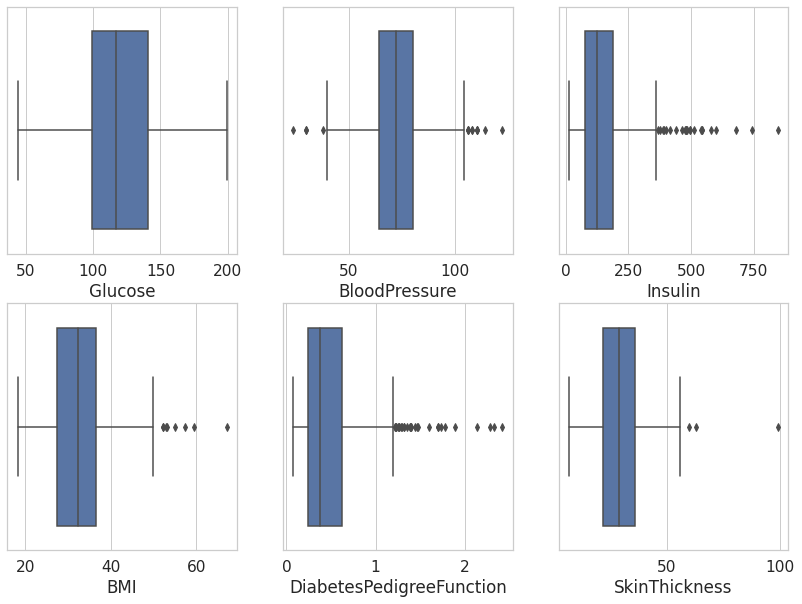

In [ ]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(2,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(2,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(2,3,5)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)
plt.subplot(2,3,6)
sns.boxplot(x='SkinThickness',data=df)

In [ ]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace =True)
df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace =True)
df['Insulin'].fillna(df['Insulin'].mean(), inplace =True)
df['BMI'].fillna(df['BMI'].median(), inplace =True)
df['DiabetesPedigreeFunction'].fillna(df['DiabetesPedigreeFunction'].median(), inplace =True)
df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace =True)

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

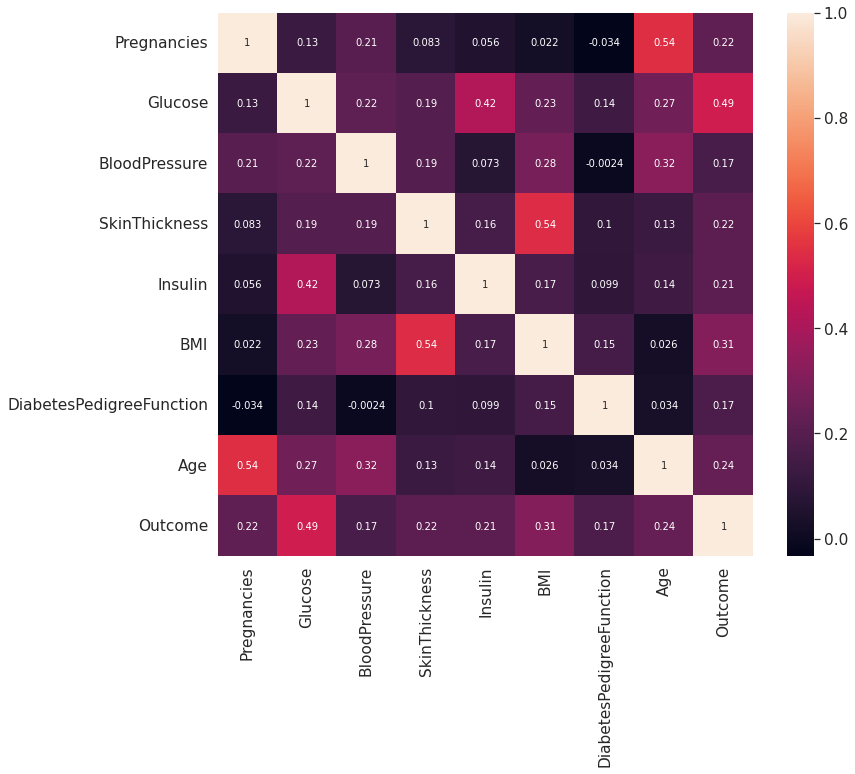

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize = (12,10))

sns.heatmap(df.corr(), annot =True)

In [ ]:
dia_corr = corr_matrix['Outcome'].sort_values(ascending = False)
dia_corr

Outcome                     1.000000
Glucose                     0.492928
BMI                         0.312038
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.215299
Insulin                     0.214411
DiabetesPedigreeFunction    0.173844
BloodPressure               0.165723
Name: Outcome, dtype: float64

**Univariate Analysis**

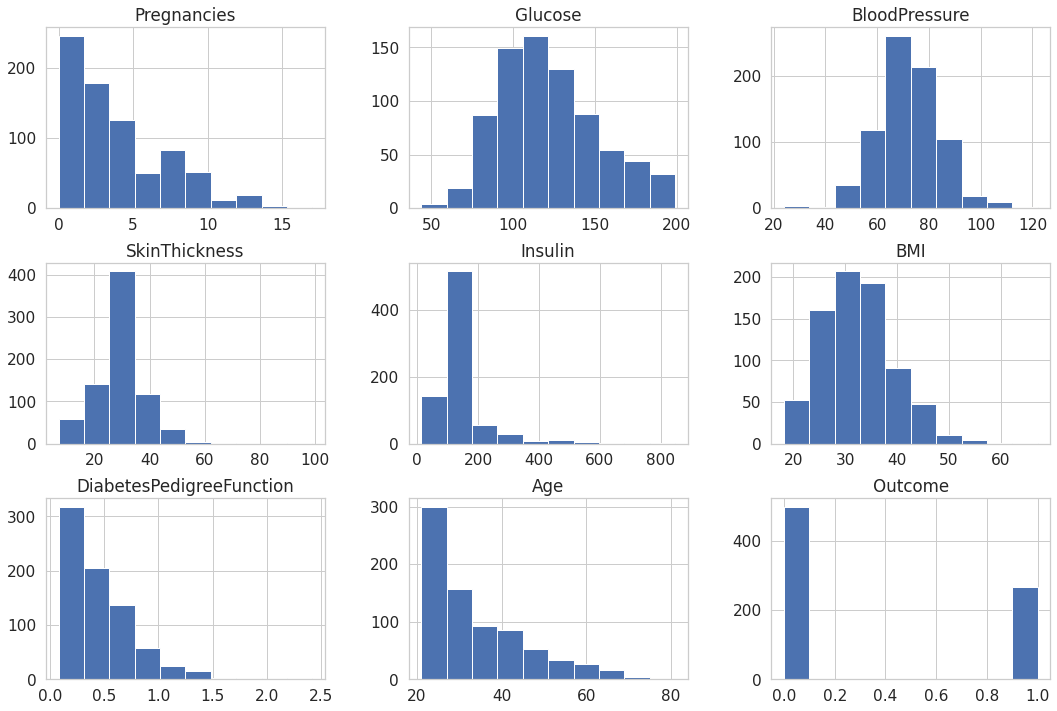

In [ ]:
df.hist(figsize=(18,12))
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4cb4bccd0>],
      dtype=object)

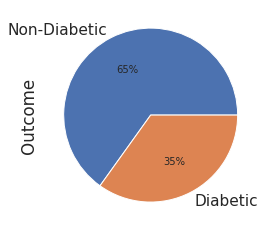

In [ ]:
labels = ["Non-Diabetic", "Diabetic"]

df["Outcome"].value_counts().plot(kind="pie",labels=labels,subplots=True,autopct='%1.0f%%')

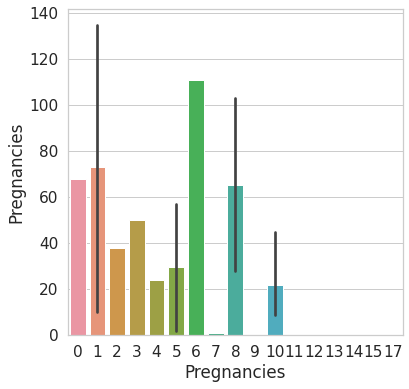

In [ ]:
y = df["Pregnancies"].value_counts()
plt.figure(figsize = (6,6))
sns.barplot(x='Pregnancies', y= y, data=df)
plt.show()

**Bivariate Analysis**

([<matplotlib.axis.XTick at 0x7fe4c88785d0>,
 [Text(0, 0, 'Non-Diabetic'), Text(0, 0, 'Diabetic')])

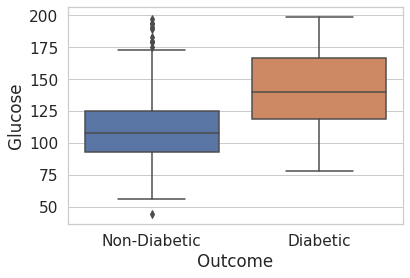

In [ ]:
sns.boxplot(data=df,x='Outcome',y='Glucose')
plt.title('')
plt.xticks([0, 1], ["Non-Diabetic", "Diabetic"])

([<matplotlib.axis.XTick at 0x7fe4c87fde10>,
 [Text(0, 0, 'Non-Diabetic'), Text(0, 0, 'Diabetic')])

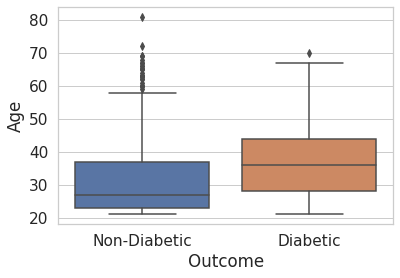

In [ ]:
sns.boxplot(data=df,x='Outcome',y='Age')
plt.title('')
plt.xticks([0, 1], ["Non-Diabetic", "Diabetic"])

([<matplotlib.axis.XTick at 0x7fe4c87855d0>,
 [Text(0, 0, 'Non-Diabetic'), Text(0, 0, 'Diabetic')])

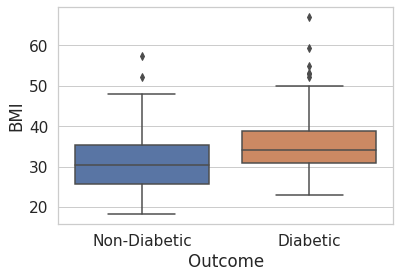

In [ ]:
sns.boxplot(data=df,x='Outcome',y='BMI')
plt.title('')
plt.xticks([0, 1], ["Non-Diabetic", "Diabetic"])

# **Model Implementation**

In [ ]:
#train_test_splitting of the dataset

x = df.drop(columns = 'Outcome')

# Getting Predicting Value
y = df['Outcome']

from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## **Model Implementations**

**LogisticRegression**

Classification Report : 
--------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.60      0.66        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.81       154

--------------------------------------------
Confusion Matrix plot


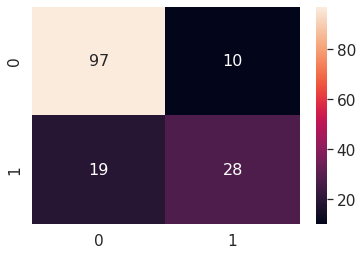

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
conf_matrix_plot(cm) 
print("Classification Report : ")
print("--------------------------------------------")
print(classification_report(y_test,y_pred))
print("--------------------------------------------")
LR_acc1 = accuracy_score(y_test,y_pred)                                 # Accuracy of the model
print("Confusion Matrix plot")

**Support Vector Classifier (SVC)**

Classification Report : 
--------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       107
           1       0.60      0.60      0.60        47

    accuracy                           0.75       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.75      0.75      0.75       154

--------------------------------------------
Confusion Matrix 


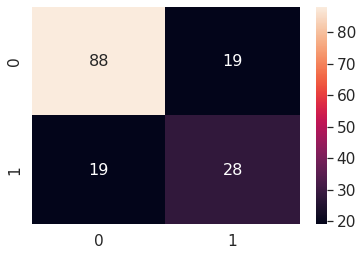

In [ ]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='sigmoid')
svm_classifier.fit(x_train,y_train)
y_pred = svm_classifier.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
conf_matrix_plot(cm) 
print("Classification Report : ")
print("--------------------------------------------")
print(classification_report(y_test,y_pred))
print("--------------------------------------------")
SVC_acc1 = accuracy_score(y_test,y_pred)                                 # Accuracy of the model
print("Confusion Matrix ")

**DecisionTreeClassifier**

Classification Report : 
--------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       107
           1       0.53      0.49      0.51        47

    accuracy                           0.71       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.71      0.71      0.71       154

--------------------------------------------
Confusion Matrix 


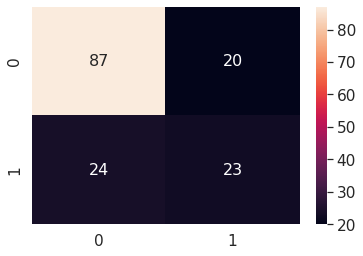

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(random_state = 151,max_depth=5)
tree_classifier

tree_classifier.fit(x_train,y_train)

y_pred = tree_classifier.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
conf_matrix_plot(cm) 
print("Classification Report : ")
print("--------------------------------------------")
print(classification_report(y_test,y_pred))
print("--------------------------------------------")
print("Confusion Matrix ")
DTC_acc1 = accuracy_score(y_test,y_pred)                                 # Accuracy of the model


**RandomForestClassifier**

Classification Report : 
--------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       107
           1       0.72      0.70      0.71        47

    accuracy                           0.82       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.82      0.82      0.82       154

--------------------------------------------
Confusion Matrix 


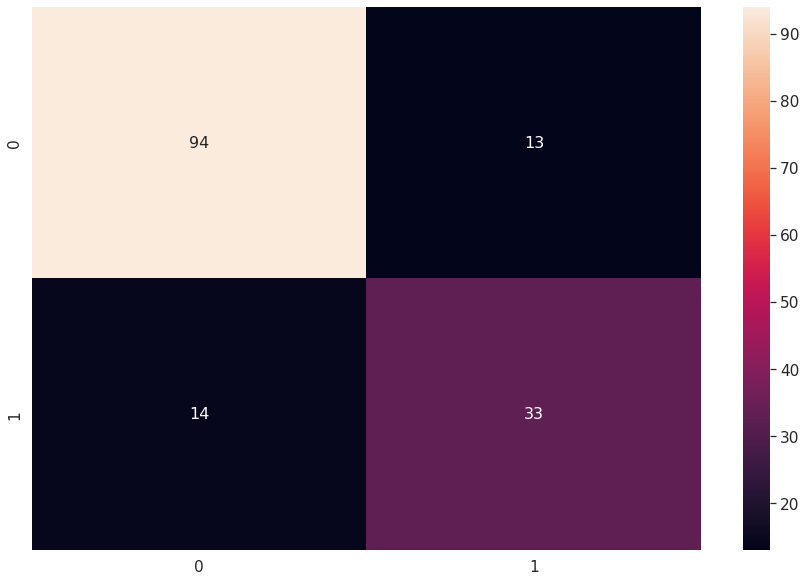

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=151,n_estimators=100)
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
conf_matrix_plot(cm) 
print("Classification Report : ")
print("--------------------------------------------")
print(classification_report(y_test,y_pred))
print("--------------------------------------------")
RFC_acc1 = accuracy_score(y_test,y_pred)                                 # Accuracy of the model
print("Confusion Matrix ")

**Extreme Gradient Boosting(XGBClassifier)**

[08:51:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Classification Report : 
--------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       107
           1       0.72      0.70      0.71        47

    accuracy                           0.82       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.82      0.82      0.82       154

--------------------------------------------
Confusion Matrix 


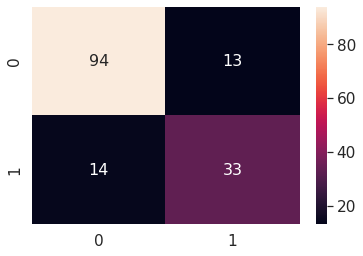

In [ ]:
from xgboost import XGBClassifier

xgb =XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

xgb.fit(x_train, y_train)

cm = confusion_matrix(y_test,y_pred)
conf_matrix_plot(cm) 
print("Classification Report : ")
print("--------------------------------------------")
print(classification_report(y_test,y_pred))
print("--------------------------------------------")
XGB_acc1 = accuracy_score(y_test,y_pred)                                 # Accuracy of the model
print("Confusion Matrix ")

**Artificial Neural Network(ANN)**

In [ ]:
import tensorflow as tf
ann = tf.keras.Sequential()
ann.add(tf.keras.layers.Dense(units=12,activation='relu'))
ann.add(tf.keras.layers.Dense(units=12,activation='relu'))
ann.add(tf.keras.layers.Dense(units=12,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
ann.fit(x_train,y_train,batch_size=12,epochs=100)

Epoch 1/100
52/52 [==============================] - 2s 4ms/step - loss: 0.6633 - accuracy: 0.6352
Epoch 2/100
52/52 [==============================] - 0s 4ms/step - loss: 0.6002 - accuracy: 0.6401
Epoch 3/100
52/52 [==============================] - 0s 5ms/step - loss: 0.5651 - accuracy: 0.6466
Epoch 4/100
52/52 [==============================] - 0s 4ms/step - loss: 0.5439 - accuracy: 0.6678
Epoch 5/100
52/52 [==============================] - 0s 5ms/step - loss: 0.5282 - accuracy: 0.7394
Epoch 6/100
52/52 [==============================] - 0s 7ms/step - loss: 0.5158 - accuracy: 0.7606
Epoch 7/100
52/52 [==============================] - 0s 5ms/step - loss: 0.5055 - accuracy: 0.7606
Epoch 8/100
52/52 [==============================] - 0s 4ms/step - loss: 0.4963 - accuracy: 0.7557
Epoch 9/100
52/52 [==============================] - 0s 5ms/step - loss: 0.4885 - accuracy: 0.7622
Epoch 10/100
52/52 [==============================] - 0s 4ms/step - loss: 0.4812 - accuracy: 0.7687
Epoch 11/

Classification Report : 
--------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       107
           1       0.64      0.68      0.66        47

    accuracy                           0.79       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.79      0.79      0.79       154

--------------------------------------------
Confusion Matrix 


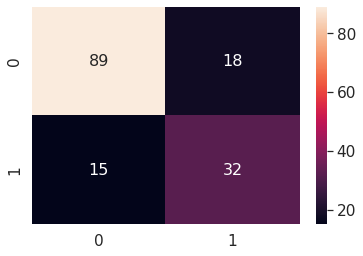

In [ ]:
y_pred = ann.predict(x_test)
y_pred = np.round(y_pred,0)
cm = confusion_matrix(y_test,y_pred)
conf_matrix_plot(cm) 
print("Classification Report : ")
print("--------------------------------------------")
print(classification_report(y_test,y_pred))
print("--------------------------------------------")
ANN_acc1 = accuracy_score(y_test,y_pred)                                 # Accuracy of the model
print("Confusion Matrix ")


In [ ]:
models = pd.DataFrame({'Model' : ['Logistic Regression', 'SVC','Decision Tree Classifier', 'Random Forest Classifier','XGBClassifier','ANN']
                      ,'Accuracy(%)' : [LR_acc1,SVC_acc1,DTC_acc1,RFC_acc1,XGB_acc1,ANN_acc1]})
models['Accuracy(%)'] = (np.round(models['Accuracy(%)'],3))*100
models.sort_values(by = 'Accuracy(%)', ascending = False)

,Model,Accuracy(%)
3,Random Forest Classifier,82.5
4,XGBClassifier,82.5
0,Logistic Regression,81.2
5,ANN,78.6
1,SVC,75.3
2,Decision Tree Classifier,71.4


In [ ]:
# print(" Feature Importances")
# showimp(rfc, x, y)

In [ ]:
!pip install scikit-plot

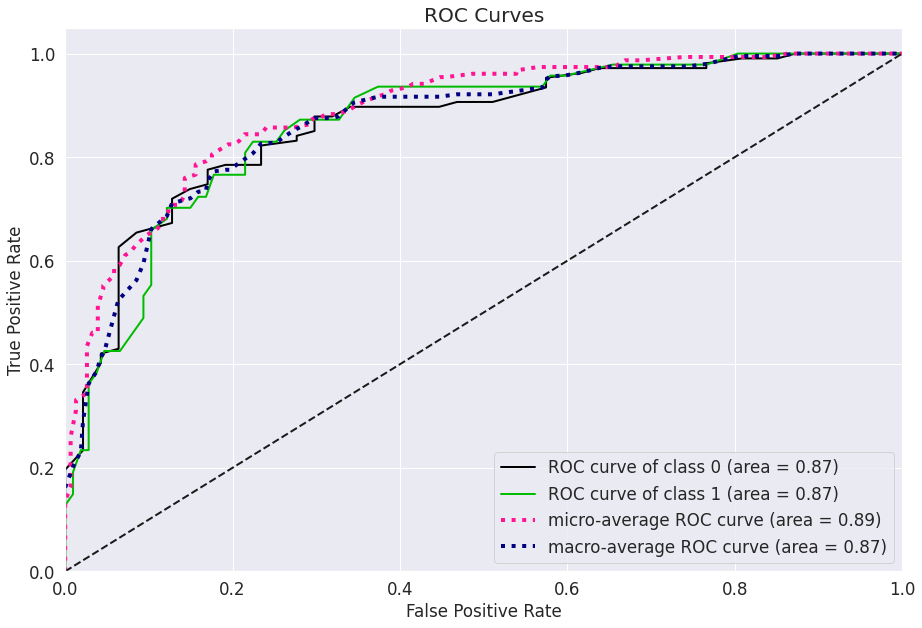

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)

y_true = y_test
y_probas = rfc.predict_proba(x_test)
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()  